In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import csv

After importing the necessary libraries, reading the train.csv

In [2]:
Sales_Data = pd.read_csv('train.csv')

C:\Sumit\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Reading the store.csv

In [3]:
Store_Data = pd.read_csv('store.csv')

In [4]:
Sales_Data.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [5]:
Store_Data.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


Grouping Store and Day of the week that has maximum sales

In [6]:
Sales_Max = Sales_Data.groupby(['Store', 'DayOfWeek'])['Sales'].max()

In [7]:
Sales_Max.head()

Store  DayOfWeek
1      1            9528
       2            7959
       3            7821
       4            7785
       5            8414
Name: Sales, dtype: int64

Reseting the index 'Store'

In [8]:
Sales_Max_DI = Sales_Max.reset_index(['Store'])

Reseting the index 'DayOfWeek'

In [9]:
Sales_Max_DI_1 = Sales_Max_DI.reset_index(['DayOfWeek'])

In [10]:
Sales_Max_DI_1.head()

,DayOfWeek,Store,Sales
0,1,1,9528
1,2,1,7959
2,3,1,7821
3,4,1,7785
4,5,1,8414


Plotting a swarm plot depicting the days on which Sales are higher -- Sales are high on day 1 and less on day 7

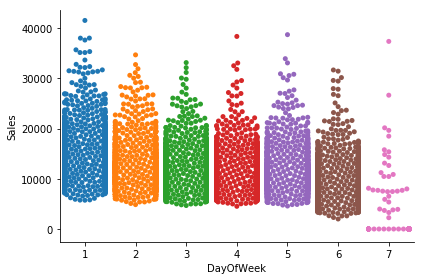

In [11]:
sns.catplot(x='DayOfWeek', y='Sales', data=Sales_Max_DI_1, kind='swarm', height=4, aspect=1.5)

In [12]:
Sales_Data.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


Extracting the year from 'Date' and creating a new column 'year'

In [13]:
Sales_Data['year'] = pd.DatetimeIndex(Sales_Data['Date']).year

In [14]:
Sales_Data.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,year
0,1,5,2015-07-31,5263,555,1,1,0,1,2015
1,2,5,2015-07-31,6064,625,1,1,0,1,2015
2,3,5,2015-07-31,8314,821,1,1,0,1,2015
3,4,5,2015-07-31,13995,1498,1,1,0,1,2015
4,5,5,2015-07-31,4822,559,1,1,0,1,2015


Grouping by store and year and sum both Sales and Customers

In [15]:
Sales_Data_1 = Sales_Data.groupby(['Store', 'year' ])['Sales', 'Customers'].sum().reset_index()

In [16]:
Sales_Data_1.head()

,Store,year,Sales,Customers
0,1,2013,1491140,178804
1,1,2014,1433408,168764
2,1,2015,792306,92955
3,2,2013,1488164,177796
4,2,2014,1516432,178057


Melting the Store data to show whether the store have promotion or not

In [17]:
Store_Data_1 = pd.melt(frame=Store_Data, id_vars=["Store", "CompetitionOpenSinceYear"], value_vars='Promo2', var_name = 'Continous_Promo', value_name = 'Result')

In [18]:
Store_Data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 4 columns):
Store                       1115 non-null int64
CompetitionOpenSinceYear    761 non-null float64
Continous_Promo             1115 non-null object
Result                      1115 non-null int64
dtypes: float64(1), int64(2), object(1)
memory usage: 34.9+ KB


In [19]:
Store_Data_1.head()

,Store,CompetitionOpenSinceYear,Continous_Promo,Result
0,1,2008.0,Promo2,0
1,2,2007.0,Promo2,1
2,3,2006.0,Promo2,1
3,4,2009.0,Promo2,0
4,5,2015.0,Promo2,0


Replacing NaN with 0

In [20]:
Store_Data_1.replace(np.nan, 0, inplace=True)

converting the float into integer

In [21]:
Store_Data_1.astype({'CompetitionOpenSinceYear' : 'int32'})

,Store,CompetitionOpenSinceYear,Continous_Promo,Result
0,1,2008,Promo2,0
1,2,2007,Promo2,1
2,3,2006,Promo2,1
3,4,2009,Promo2,0
4,5,2015,Promo2,0
5,6,2013,Promo2,0
6,7,2013,Promo2,0
7,8,2014,Promo2,0
8,9,2000,Promo2,0
9,10,2009,Promo2,0


Renaming the column into a new column name

In [22]:
Store_Data_1.rename(columns ={'CompetitionOpenSinceYear' : 'year'}, inplace=True)

Merging the Sales and Store DataFrame on 'Store' & 'year'

In [23]:
Sales_Store = pd.merge(left=Sales_Data_1, right=Store_Data_1, 
on=None, left_on=['Store', 'year'], right_on=['Store', 'year'])

In [24]:
Sales_Store.head()

,Store,year,Sales,Customers,Continous_Promo,Result
0,5,2015,816125,92771,Promo2,0
1,6,2013,1906699,220728,Promo2,0
2,7,2013,2613931,287207,Promo2,0
3,8,2014,1689700,202266,Promo2,0
4,14,2014,1686926,192057,Promo2,1


Finding all the stores that has promotions

In [25]:
Sales_Store_CPromo = Sales_Store.loc[Sales_Store['Result'] == 1]

In [26]:
Sales_Store_CPromo.head()

,Store,year,Sales,Customers,Continous_Promo,Result
4,14,2014,1686926,192057,Promo2,1
5,28,2014,1589047,172399,Promo2,1
6,30,2014,1532860,224586,Promo2,1
10,47,2013,2074650,275636,Promo2,1
11,51,2013,1927531,148338,Promo2,1


Finding all the stores that doesn't have promotions

In [27]:
Sales_Store_NPromo = Sales_Store.loc[Sales_Store['Result'] == 0]

In [28]:
Sales_Store_NPromo.head()

,Store,year,Sales,Customers,Continous_Promo,Result
0,5,2015,816125,92771,Promo2,0
1,6,2013,1906699,220728,Promo2,0
2,7,2013,2613931,287207,Promo2,0
3,8,2014,1689700,202266,Promo2,0
7,33,2013,2587618,258267,Promo2,0


Plotting graphs -- Sales without promotion and Sales with Promotion

Text(0.5, 1.0, 'Sales with promotion')

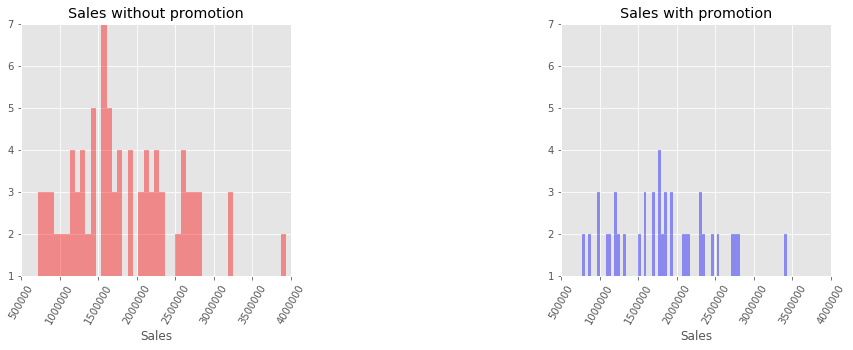

In [29]:
plt.style.use('ggplot')
plt.subplots_adjust(left=None, bottom=None, right=2, top=1, wspace=1, hspace=0)
plt.subplot(1,2,1)
sns.distplot(Sales_Store_NPromo['Sales'], kde=False, color='red', bins=100)
plt.axis((500000, 4000000, 1, 7))
plt.xticks(rotation=60)
plt.title('Sales without promotion')
plt.subplot(1,2,2)
sns.distplot(Sales_Store_CPromo['Sales'], kde=False, color='blue', bins=100)
plt.axis((500000, 4000000, 1, 7))
plt.xticks(rotation=60)
plt.title('Sales with promotion')

Plotting no of customers with promotion and without promotion

Text(0.5, 1.0, 'No of customers with promotion')

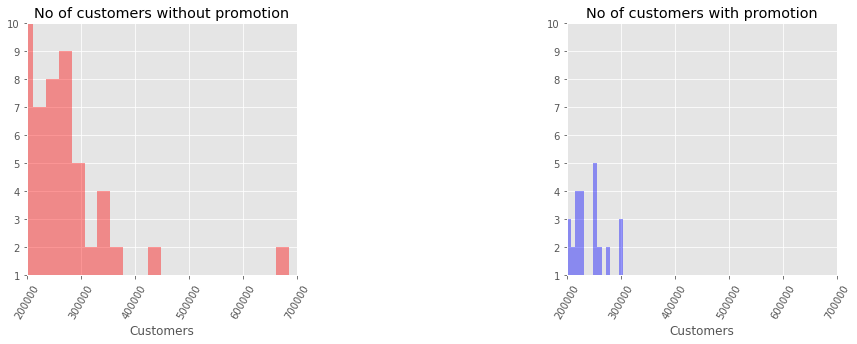

In [30]:
plt.style.use('ggplot')
plt.subplots_adjust(left=None, bottom=None, right=2, top=1, wspace=1, hspace=0)
plt.subplot(1,2,1)
sns.distplot(Sales_Store_NPromo['Customers'], kde=False, color='red', bins=50)
plt.axis((200000, 700000, 1, 10))
plt.xticks(rotation=60)
plt.title('No of customers without promotion')
plt.subplot(1,2,2)
sns.distplot(Sales_Store_CPromo['Customers'], kde=False, color='blue', bins=50)
plt.axis((200000, 700000, 1, 10))
plt.xticks(rotation=60)
plt.title('No of customers with promotion')

In [31]:
Sales_Store_NPromo.head()

,Store,year,Sales,Customers,Continous_Promo,Result
0,5,2015,816125,92771,Promo2,0
1,6,2013,1906699,220728,Promo2,0
2,7,2013,2613931,287207,Promo2,0
3,8,2014,1689700,202266,Promo2,0
7,33,2013,2587618,258267,Promo2,0


In [32]:
Sales_Store_NPromo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 108 entries, 0 to 186
Data columns (total 6 columns):
Store              108 non-null int64
year               108 non-null int64
Sales              108 non-null int64
Customers          108 non-null int64
Continous_Promo    108 non-null object
Result             108 non-null int64
dtypes: int64(5), object(1)
memory usage: 5.9+ KB


Sales vs Customers with promotion and without promotion

Text(0.5, 1.0, 'Sales vs Customers with promotion')

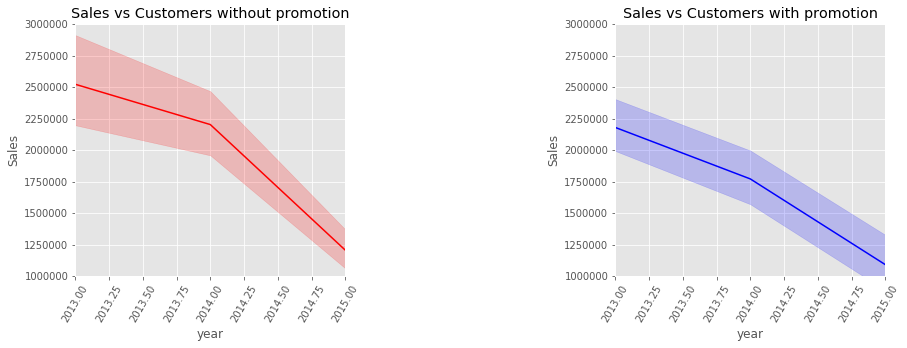

In [33]:
plt.style.use('ggplot')
plt.subplots_adjust(left=None, bottom=None, right=2, top=1, wspace=1, hspace=2)
plt.subplot(1,2,1)
sns.lineplot(y='Sales', x='year', data=Sales_Store_NPromo, color='red', dashes=False, markers=True)
plt.axis((2013, 2015, 1000000, 3000000))
plt.xticks(rotation=60)
plt.title('Sales vs Customers without promotion')
plt.subplot(1,2,2)
sns.lineplot(y='Sales', x='year', data=Sales_Store_CPromo, color='blue', dashes=False, markers=True)
plt.axis((2013, 2015, 1000000, 3000000))
plt.xticks(rotation=60)
plt.title('Sales vs Customers with promotion')

What we can conclude from above charts that the promotion is not working. Both Sales and customers are decreasing with promotion